In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from collections import OrderedDict

In [3]:
# !wget http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz

In [4]:
# !tar -xvf 'EnglishImg.tgz' -C '/gdrive/MyDrive/Colab Notebooks'

In [5]:
path='/gdrive/MyDrive/Colab Notebooks/English/Img/GoodImg/Bmp'

In [6]:
folders = []
for root, dirnames, filenames in os.walk(path):
    for j in dirnames:
      folders.append(j)
    #print("filenames",filenames)
  #print('root   ',root,',  dirnames: - ',dirnames,'   filenames',filenames)

In [7]:
len(folders)

62

In [8]:
files = {}
for i in folders:
  files[i]=os.listdir("/gdrive/MyDrive/Colab Notebooks/English/Img/GoodImg/Bmp/"+i)
  #files.add(os.listdir("/content/English/Img/BadImag/Bmp/"+i))

In [9]:
dict1 = OrderedDict(sorted(files.items()))
dict1.keys()

odict_keys(['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062'])

In [10]:
f = open("labels.txt", "a")
for i in dict1.keys():
  for j in dict1[i]:
    f.write("English/Img/GoodImg"+i+"/"+j+"\n")
f.close()

In [11]:
l="0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [12]:
data=[]
labels=[]
tmp=0

In [13]:
img=cv2.imread('/gdrive/MyDrive/Colab Notebooks/English/Img/GoodImg/Bmp/Sample041/img041-00215.png')

In [14]:
img.shape

(80, 71, 3)

In [15]:
img = cv2.cvtColor(cv2.imread('/gdrive/MyDrive/Colab Notebooks/English/Img/GoodImg/Bmp/Sample041/img041-00215.png'), cv2.COLOR_BGR2GRAY)

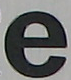

In [16]:
cv2_imshow(cv2.imread('/gdrive/MyDrive/Colab Notebooks/English/Img/GoodImg/Bmp/Sample041/img041-00215.png'))

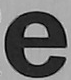

In [17]:
cv2_imshow(img)

In [18]:
def conTO28x28(path):
  #img = cv2.cvtColor(cv2.imread('/gdrive/MyDrive/Colab Notebooks/OCR/Data/English/Img/GoodImg/Bmp/Sample041/img041-00190.png'), cv2.COLOR_BGR2GRAY)   
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)   

  # convert each image of shape (32, 28, 1)
  w, h = img.shape
  if h > 28 or w > 28:
    (tH, tW) = img.shape
    dX = int(max(0, 28 - tW) / 2.0)
    dY = int(max(0, 28 - tH) / 2.0)

    img = cv2.copyMakeBorder(img, top=dY, bottom=dY,
          left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
          value=(0, 0, 0))
    img = cv2.resize(img, (28, 28))

  w, h = img.shape

  if w < 28:
      add_zeros = np.ones((28-w, h))*255
      img = np.concatenate((img, add_zeros))

  if h < 28:
      add_zeros = np.ones((28, 28-h))*255
      img = np.concatenate((img, add_zeros), axis=1)
  #img = np.expand_dims(img, axis=2)
  # Normalize each image
  return img

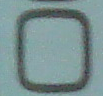

In [19]:
cv2_imshow(cv2.imread('/gdrive/MyDrive/Colab Notebooks/English/Img/GoodImg/Bmp/Sample001/img001-00001.png'))

In [20]:
image = conTO28x28('/gdrive/MyDrive/Colab Notebooks/English/Img/GoodImg/Bmp/Sample001/img001-00001.png')

In [21]:
image.shape

(28, 28)

In [22]:
cv2_imshow(image)

In [23]:
for i in dict1.keys():
  for j in dict1[i]:
    # labels list contains labels of images 
    labels.append(tmp)
    #image=cv2.imread('/gdrive/MyDrive/Colab Notebooks/English/Img/GoodImg/Bmp/'+i+"/"+j)
    image = conTO28x28('/gdrive/MyDrive/Colab Notebooks//English/Img/GoodImg/Bmp/'+i+"/"+j)
    # Data list containing images in the form of numpy array 
    data.append(image)
  tmp+=1

In [24]:
from numpy import save

In [25]:
len(labels)

7705

In [26]:
labels = np.array(labels, dtype="int")
data = np.array(data, dtype='float32')

In [27]:
tmp

62

In [28]:
labels

array([ 0,  0,  0, ..., 61, 61, 61])

In [29]:
save('data.npy', data)
save('labels.npy', labels)

In [30]:
tmp_data = np.load('data.npy')
tmp_data.shape

(7705, 28, 28)

In [31]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [32]:
def load_az_dataset(datasetPath):
  data = []
  labels = []
  for row in open(datasetPath):
    row = row.split(",")
    label = int(row[0])
    image = np.array([int(x) for x in row[1:]], dtype="uint8")
    image = image.reshape((28, 28))
    data.append(image)
    labels.append(label)
  data = np.array(data, dtype='float32')
  labels = np.array(labels, dtype="int")
  return (data, labels)

In [33]:
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
(azData, azLabels) = load_az_dataset('/gdrive/MyDrive/A_Z_Handwritten_Data.csv')

In [34]:
azData.shape

(372451, 28, 28)

In [35]:
mnist_data = np.vstack([trainData, testData])
mnist_labels = np.hstack([trainLabels, testLabels])

In [36]:
trainData.shape

(60000, 28, 28)

In [37]:
mnist_data[0].shape

(28, 28)

In [38]:
labels.shape

(7705,)

In [39]:
azLabels+=10

In [40]:
labels1=np.hstack([mnist_labels,labels,azLabels])
data1=np.vstack([mnist_data,data,azData])

In [41]:
print(labels1.shape)
print(data1.shape)

(450156,)
(450156, 28, 28)


In [42]:
save('/gdrive/MyDrive/Colab Notebooks/combined_data.npy', data1)
save('/gdrive/MyDrive/Colab Notebooks/combine_labels.npy', labels1)

In [43]:
loaded_data = np.load('/gdrive/MyDrive/Colab Notebooks/combined_data.npy')
loaded_labels = np.load('/gdrive/MyDrive/Colab Notebooks/combine_labels.npy')

In [44]:
print(loaded_data.shape)
print(loaded_labels.shape)

(450156, 28, 28)
(450156,)


In [45]:
cv2_imshow(loaded_data[-50000])

In [46]:
tmp_image = cv2.resize(loaded_data[0], (32, 32))

In [47]:
tmp_image.shape

(32, 32)

In [48]:
data = [cv2.resize(image, (32, 32)) for image in loaded_data]
data = np.array(data, dtype="float32")

In [49]:
data.shape

(450156, 32, 32)

In [50]:
data2 = np.expand_dims(data, axis=-1)

In [51]:
data2.shape

(450156, 32, 32, 1)

In [52]:
le = LabelBinarizer()
labels = le.fit_transform(loaded_labels)
counts = labels.sum(axis=0)
labels[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
classTotals = labels.sum(axis=0)
classWeight = {}
# loop over all classes and calculate the class weight
for i in range(0, len(classTotals)):
	classWeight[i] = classTotals.max() / classTotals[i]

classWeight

{0: 8.305793378995434,
 1: 7.316113624937154,
 2: 8.244617563739377,
 3: 8.094423585036852,
 4: 8.471401542715762,
 5: 9.127646228634154,
 6: 8.387175792507204,
 7: 7.929028742678109,
 8: 8.488697681201693,
 9: 8.324799771167047,
 10: 4.034308289437205,
 11: 6.6272344301491515,
 12: 2.463892651540806,
 13: 5.637481840193705,
 14: 4.897105838801952,
 15: 46.86553945249597,
 16: 9.857239627434378,
 17: 7.85413574416408,
 18: 40.933192686357245,
 19: 6.791948658109685,
 20: 10.22071992976295,
 21: 4.932378611982036,
 22: 4.662154585502603,
 23: 3.004542404377226,
 24: 1.0,
 25: 2.984974358974359,
 26: 9.955019668205917,
 27: 4.868841488916771,
 28: 1.1937203912963228,
 29: 2.5521550401192616,
 30: 2.000240549828179,
 31: 13.644397562119082,
 32: 5.364206063957239,
 33: 9.163570528967254,
 34: 5.327384221123925,
 35: 9.493883542652096,
 36: 368.3987341772152,
 37: 1531.7631578947369,
 38: 923.9206349206349,
 39: 1265.3695652173913,
 40: 256.4185022026432,
 41: 1573.162162162162,
 42: 1616.

In [54]:
print("Data shape: -",data2.shape)
print("labels shape: -",labels.shape)

Data shape: - (450156, 32, 32, 1)
labels shape: - (450156, 62)


In [55]:
(trainX, testX, trainY, testY) = train_test_split(data2,
	labels, test_size=0.20, stratify=labels, random_state=42)

In [56]:
trainX.shape

(360124, 32, 32, 1)

In [57]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    fill_mode="nearest")

In [58]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import add
from keras.regularizers import l2
from keras import backend as K

In [59]:
class ResNet:
    @staticmethod
    def residual_module(data, K, stride, chanDim, red=False,
        reg=0.0001, bnEps=2e-5, bnMom=0.9):
        # the shortcut branch of the ResNet module should be
        # initialize as the input (identity) data
        shortcut = data

        # the first block of the ResNet module are the 1x1 CONVs
        bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps,
        momentum=bnMom)(data)
        act1 = Activation("relu")(bn1)
        conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False,
        kernel_regularizer=l2(reg))(act1)

        # the second block of the ResNet module are the 3x3 CONVs
        bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps,
            momentum=bnMom)(conv1)
        act2 = Activation("relu")(bn2)
        conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride,
            padding="same", use_bias=False,
            kernel_regularizer=l2(reg))(act2)

        # the third block of the ResNet module is another set of 1x1
        # CONVs
        bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps,
            momentum=bnMom)(conv2)
        act3 = Activation("relu")(bn3)
        conv3 = Conv2D(K, (1, 1), use_bias=False,
            kernel_regularizer=l2(reg))(act3)

        # if we are to reduce the spatial size, apply a CONV layer to
        # the shortcut
        if red:
            shortcut = Conv2D(K, (1, 1), strides=stride,
                use_bias=False, kernel_regularizer=l2(reg))(act1)
        # add together the shortcut and the final CONV
        x = add([conv3, shortcut])

        # return the addition as the output of the ResNet module
        return x
    
    @staticmethod
    def build(width, height, depth, classes, stages, filters,
        reg=0.0001, bnEps=2e-5, bnMom=0.9, dataset="cifar"):
        # initialize the input shape to be "channels last" and the
        # channels dimension itself
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # set the input and apply BN
        inputs = Input(shape=inputShape)
        x = BatchNormalization(axis=chanDim, epsilon=bnEps,
            momentum=bnMom)(inputs)

        # check if we are utilizing the CIFAR dataset
        if dataset == "cifar":
            # apply a single CONV layer
            x = Conv2D(filters[0], (3, 3), use_bias=False,
            padding="same", kernel_regularizer=l2(reg))(x)

        # check to see if we are using the Tiny ImageNet dataset
        elif dataset == "tiny_imagenet":
            # apply CONV => BN => ACT => POOL to reduce spatial size
            x = Conv2D(filters[0], (5, 5), use_bias=False,
                padding="same", kernel_regularizer=l2(reg))(x)
            x = BatchNormalization(axis=chanDim, epsilon=bnEps,
            momentum=bnMom)(x)
            x = Activation("relu")(x)
            x = ZeroPadding2D((1, 1))(x)
            x = MaxPooling2D((3, 3), strides=(2, 2))(x)
        
        # loop over the number of stages
        for i in range(0, len(stages)):
            # initialize the stride, then apply a residual module
            # used to reduce the spatial size of the input volume
            stride = (1, 1) if i == 0 else (2, 2)
            x = ResNet.residual_module(x, filters[i + 1], stride,
                chanDim, red=True, bnEps=bnEps, bnMom=bnMom)

            # loop over the number of layers in the stage
            for j in range(0, stages[i] - 1):
                # apply a ResNet module
                x = ResNet.residual_module(x, filters[i + 1],
                    (1, 1), chanDim, bnEps=bnEps, bnMom=bnMom)
            
            # apply BN => ACT => POOL
        x = BatchNormalization(axis=chanDim, epsilon=bnEps,
            momentum=bnMom)(x)
        x = Activation("relu")(x)
        x = AveragePooling2D((8, 8))(x)

        # softmax classifier
        x = Flatten()(x)
        x = Dense(classes, kernel_regularizer=l2(reg))(x)
        x = Activation("softmax")(x)

        # create the model
        model = Model(inputs, x, name="resnet")

        # return the constructed network architecture
        return model

In [60]:
EPOCHS = 10 # Train mode for 50 epochs
INIT_LR = 1e-1 # Take initial learning rate as 0.01
BS = 64 # Taking batch size of 256


In [61]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [62]:
print("[INFO] compiling model...")
opt = SGD(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS) # Using SGD(Schotastic Gradient Descent) as optimizer

model = ResNet.build(32, 32, 1, len(le.classes_), (3, 3, 3),
	(64, 64, 128, 256), reg=0.0005)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [63]:
import numpy as np
import os
checkpoint_path = "/gdrive/MyDrive/Colab Notebooks/CombineDatasetModels/training_1/cp.ckpt"

In [64]:
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS,
	class_weight=classWeight,
	verbose=1,
  callbacks=[cp_callback])


Epoch 1/10
5625/5626 [============================>.] - ETA: 0s - loss: 90.0521 - accuracy: 0.0643
Epoch 1: saving model to /gdrive/MyDrive/Colab Notebooks/CombineDatasetModels/training_1/cp.ckpt
5626/5626 [==============================] - 247s 41ms/step - loss: 90.0494 - accuracy: 0.0643 - val_loss: 57.1963 - val_accuracy: 0.0967
Epoch 2/10
5626/5626 [==============================] - ETA: 0s - loss: 81.7595 - accuracy: 0.0858
Epoch 2: saving model to /gdrive/MyDrive/Colab Notebooks/CombineDatasetModels/training_1/cp.ckpt
5626/5626 [==============================] - 231s 41ms/step - loss: 81.7595 - accuracy: 0.0858 - val_loss: 56.7680 - val_accuracy: 0.1019
Epoch 3/10
5626/5626 [==============================] - ETA: 0s - loss: 81.1189 - accuracy: 0.0931
Epoch 3: saving model to /gdrive/MyDrive/Colab Notebooks/CombineDatasetModels/training_1/cp.ckpt
5626/5626 [==============================] - 225s 40ms/step - loss: 81.1189 - accuracy: 0.0931 - val_loss: 56.5022 - val_accuracy: 0.115

In [ ]:
model.save('ocr_model.h5')

In [ ]:
labelNames = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
labelNames = [l for l in labelNames]
print("[INFO] evaluating network ")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=labelNames,zero_division=0))

In [ ]:
EPOCHS=50

In [ ]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS,
	class_weight=classWeight,
	verbose=1,
  callbacks=[cp_callback])

In [ ]:
labelNames = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
labelNames = [l for l in labelNames]
print("[INFO] evaluating network ")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),
  predictions.argmax(axis=1), target_names=labelNames,zero_division=0))

In [ ]:
model.save('ocr_prediction.h5')
model.save_weights("weight")

In [ ]:
# save the model to disk
print("[INFO] serializing network...")
#model.save('first_model', save_format="h5")
# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
#plt.savefig('plot'

In [ ]:
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = load_model('ocr_prediction.h5')

In [ ]:
def predict_image(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 30, 150)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
      cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    chars = []
    for c in cnts:
    # compute the bounding box of the contour
      (x, y, w, h) = cv2.boundingRect(c)
      # filter out bounding boxes, ensuring they are neither too small
      # nor too large
      if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,
          cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        (tH, tW) = thresh.shape
        # if the width is greater than the height, resize along the
        # width dimension
        if tW > tH:
          thresh = imutils.resize(thresh, width=32)
        else:
          thresh = imutils.resize(thresh, height=32)
        (tH, tW) = thresh.shape
        dX = int(max(0, 32 - tW) / 2.0)
        dY = int(max(0, 32 - tH) / 2.0)
        # pad the image and force 32x32 dimensions
        padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
          left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
          value=(0, 0, 0))
        padded = cv2.resize(padded, (32, 32))
        padded = padded.astype("float32")
        padded = np.expand_dims(padded, axis=-1)
        chars.append((padded, (x, y, w, h)))
        cv2_imshow(padded)

    boxes = [b[1] for b in chars]
    #cv2_imshow(chars)
    chars = np.array([c[0] for c in chars], dtype="float32")
    # OCR the characters using our handwriting recognition model
    preds = model.predict(chars)
    # define the list of label names
    labelNames = "0123456789"
    labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    labelNames = [l for l in labelNames]
    output=""
    for (pred, (x, y, w, h)) in zip(preds, boxes):
      i = np.argmax(pred)
      prob = pred[i]
      label = labelNames[i]
      output+=label
  
    return output

In [ ]:
predict_image('keras.png')

In [ ]:
images = []
# randomly select a few testing characters

for i in np.random.choice(np.arange(0, len(testY)), size=(49,)):
  probs = model.predict(testX[np.newaxis, i])
  prediction = probs.argmax(axis=1)
  label = labelNames[prediction[0]]
  output+=label
  image = (testX[i] * 255).astype("uint8")
  color = (0, 255, 0)
  if prediction[0] != np.argmax(testY[i]):
  color = (0, 0, 255)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
  color, 2)
  images.append(image)
  
montage = build_montages(images, (96, 96), (7, 7))[0]
cv2_imshow(montage)
cv2.waitKey(0)